In [1]:
!pip install diffusers==0.30.2 transformers accelerate safetensors langgraph coqui-tts torch torchvision torchaudio
!pip install Pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 68.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 84.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 60.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 46.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 91.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.3 MB/s e

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/TTS/api.py:93: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")


  0%|          | 0/50 [00:00<?, ?it/s]

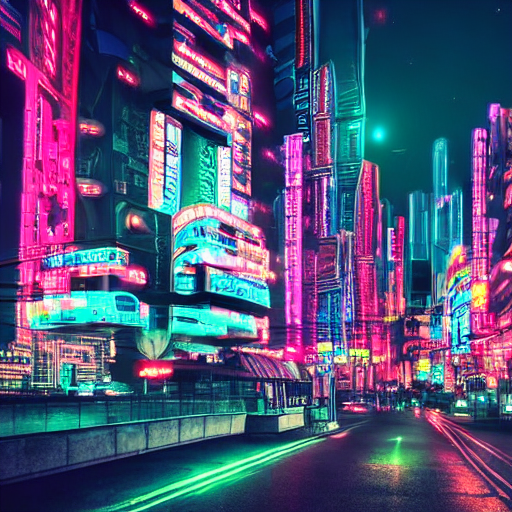

Generated Caption: neon city wallpapers by theartion


In [3]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import BlipProcessor, BlipForConditionalGeneration
from TTS.api import TTS
from langgraph.graph import StateGraph, END



device = "cuda" if torch.cuda.is_available() else "cpu"

sd_pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to(device)


processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

tts = TTS(model_name="tts_models/en/ljspeech/tacotron2-DDC", progress_bar=False, gpu=True)


from langgraph.graph import StateGraph, END

# Define our state schema
from typing import TypedDict

class AgentState(TypedDict):
    prompt: str
    image_path: str
    caption: str
    audio_path: str

# Functions for each step
def text_to_image(state: AgentState):
    prompt = state["prompt"]
    image = sd_pipe(prompt).images[0]
    image.save("generated_image.png")
    state["image_path"] = "generated_image.png"
    return state

def image_to_caption(state: AgentState):
    from PIL import Image
    raw_image = Image.open(state["image_path"]).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt").to(device)
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    state["caption"] = caption
    return state

def caption_to_audio(state: AgentState):
    tts.tts_to_file(text=state["caption"], file_path="caption_audio.wav")
    state["audio_path"] = "caption_audio.wav"
    return state

# Build the LangGraph
builder = StateGraph(AgentState)
builder.add_node("TextToImage", text_to_image)
builder.add_node("ImageToCaption", image_to_caption)
builder.add_node("CaptionToAudio", caption_to_audio)

builder.add_edge("TextToImage", "ImageToCaption")
builder.add_edge("ImageToCaption", "CaptionToAudio")

builder.set_entry_point("TextToImage")
builder.set_finish_point("CaptionToAudio")

# Compile the graph
graph = builder.compile()


prompt = "A cyberpunk city at night glowing with neon lights"
state = {"prompt": prompt}
final_state = graph.invoke(state)

from IPython.display import Image, Audio, display
display(Image(filename="generated_image.png"))
display(Audio(filename="caption_audio.wav"))
print("Generated Caption:", final_state["caption"])
